# **PREDICTING INFOSYS STOCK PRICE IN OCTOBER 2020 USING RECURRENT NEURAL NETWORK**


## **PART 1 - DATA PREPROCESSING**

IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

IMPORTING THE TRAINING SET

In [2]:
dataset_train = pd.read_csv('Infosys_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

FEATURE SCALING

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

CREATING A DATA STRUCTURE WITH 60 TIMESTEPS AND 1 OUTPUT

In [5]:
X_train = []
y_train = []
for i in range(60, 984):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

RESHAPING

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## **PART 2 - BUILDING AND TRAINING THE RNN**

IMPORTING THE KERAS LIBRARIES AND PACKAGES

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

INTIALISING THE RNN

In [8]:
regressor = Sequential()

ADDING THE FIRST LSTM LAYER AND SOME DROPOUT REGULARISATION

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

ADDING A SECOND LSTM LAYER AND SOME DROPOUT REGULARISATION

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

ADDING A THIRD LAYER AND SOME DROPOUT REGULARISATION

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

ADDING A FOURTH LAYER AND SOME DROPOUT REGULARISATION

In [12]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

ADDING THE OUTPUT LAYER

In [13]:
regressor.add(Dense(units = 1))

COMPILING THE RNN

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

FITTING THE RNN TO THE TRAINING SET

In [15]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
29/29 [==============================] - 3s 107ms/step - loss: 0.0350
Epoch 2/100
29/29 [==============================] - 3s 106ms/step - loss: 0.0083
Epoch 3/100
29/29 [==============================] - 3s 109ms/step - loss: 0.0073
Epoch 4/100
29/29 [==============================] - 3s 107ms/step - loss: 0.0070
Epoch 5/100
29/29 [==============================] - 3s 110ms/step - loss: 0.0068
Epoch 6/100
29/29 [==============================] - 3s 109ms/step - loss: 0.0055
Epoch 7/100
29/29 [==============================] - 3s 108ms/step - loss: 0.0056
Epoch 8/100
29/29 [==============================] - 3s 109ms/step - loss: 0.0060
Epoch 9/100
29/29 [==============================] - 3s 110ms/step - loss: 0.0052
Epoch 10/100
29/29 [==============================] - 3s 110ms/step - loss: 0.0045
Epoch 11/100
29/29 [==============================] - 3s 109ms/step - loss: 0.0048
Epoch 12/100
29/29 [==============================] - 3s 110ms/step - loss: 0.0046
Epoch 13/100


## **PART 3 - MAKING THE PREDICTIONS AND VISUALISING THE RESULTS**

GETTING THE REAL STOCK PRICE OF OCTOBER 2020

In [16]:
dataset_test = pd.read_csv('Infosys_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

GETTING THE PREDICTED STOCK PRICE OF OCTOBER 2020

In [17]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

VISUALISING THE RESULTS

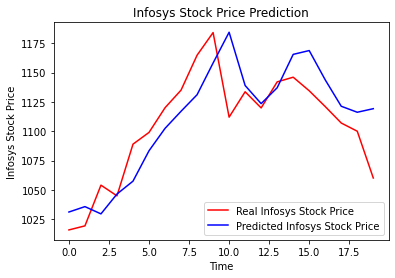

In [18]:
plt.plot(real_stock_price, color = 'red', label = 'Real Infosys Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Infosys Stock Price')
plt.title('Infosys Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Infosys Stock Price')
plt.legend()
plt.show()